In [5]:
pip install cobra-brain

  Attempting uninstall: cobra-brain
    Found existing installation: cobra-brain 1.0.2
    Uninstalling cobra-brain-1.0.2:
      Successfully uninstalled cobra-brain-1.0.2


In [6]:
import cobra

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform
from scipy.stats import kendalltau
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/destrieux - all.csv')
df = df.iloc[:, 1:]
regions_raw = list(df.columns[:150])
regions = [s.removeprefix("ctx_") for s in regions_raw]
n = len(regions)
connectivity_matrix = np.zeros((n, n))

# Compute Kendall's tau for each pair
for i in range(n):
    for j in range(i + 1, n):
        tau, _ = kendalltau(df.iloc[:, i], df.iloc[:, j])
        if np.isnan(tau):
            tau = 0
        connectivity_matrix[i, j] = tau
        connectivity_matrix[j, i] = tau

# Set diagonal to 1 (perfect correlation with itself)
np.fill_diagonal(connectivity_matrix, 1)


lobe_df = pd.read_csv('/content/destrieux - lobe.csv')
lobes = lobe_df["lobe"].tolist()
regions_lobe = regions
regions_lobe = [s.removeprefix("lh_") for s in regions_lobe]
regions_lobe = [s.removeprefix("rh_") for s in regions_lobe]
colors = [lobes[regions_lobe.index(i)] for i in regions_lobe]

def get_rgba_value(number):
    if str(number) == "frontal":
        return (234/255,67/255,53/255, 255/255)
    elif str(number) == "parietal":
        return (227/255,116/255,0/255, 255/255)
    elif str(number) == "occipital":
        return (66/255,103/255,210/255, 255/255)
    elif str(number) == "temporal":
        return (52/255,168/255,83/255, 255/255)
    elif str(number) == "limbic":
        return (255/255,194/255,0/255, 255/255)
    elif str(number) == "sub":
        return (150/255,85/255,132/255,255/255)

colors = [get_rgba_value(number) for number in colors]

Creating clustered correlation matrix visualization...


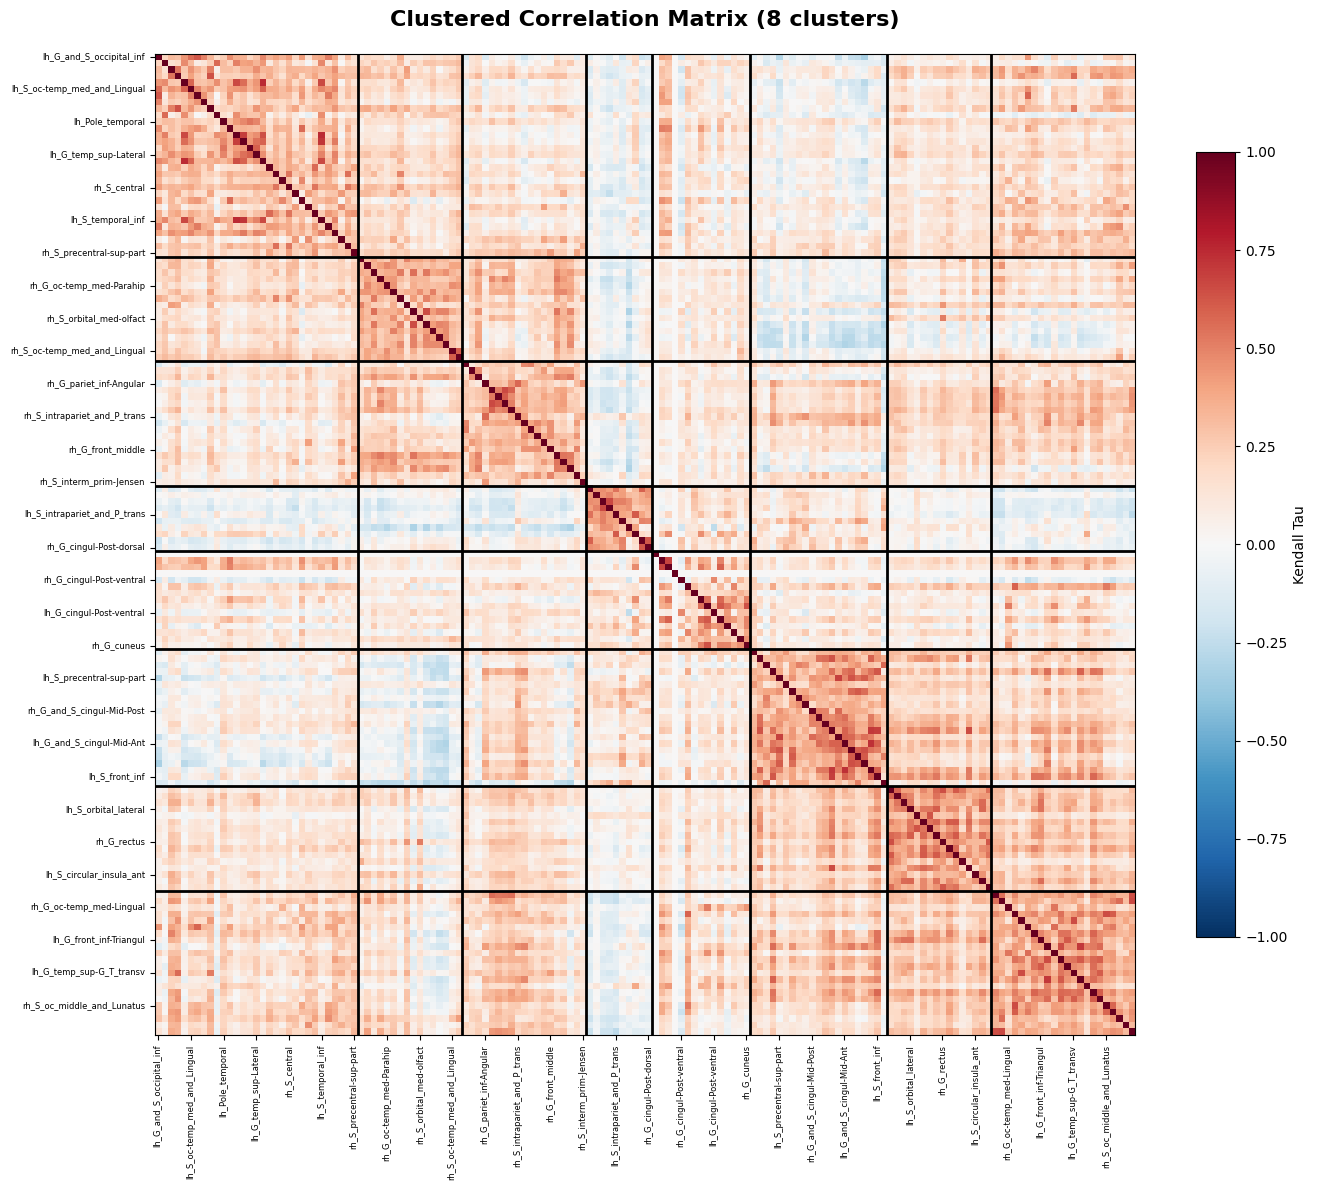

In [12]:
cluster_labels, reordered_matrix, reordered_regions = cobra.cluster.create_main_clustering_visualization(
    connectivity_matrix,
    regions,
    n_clusters=8,
)

Network created with 150 nodes and 634 edges
Threshold: 0.4 (showing 634/11175 possible connections)


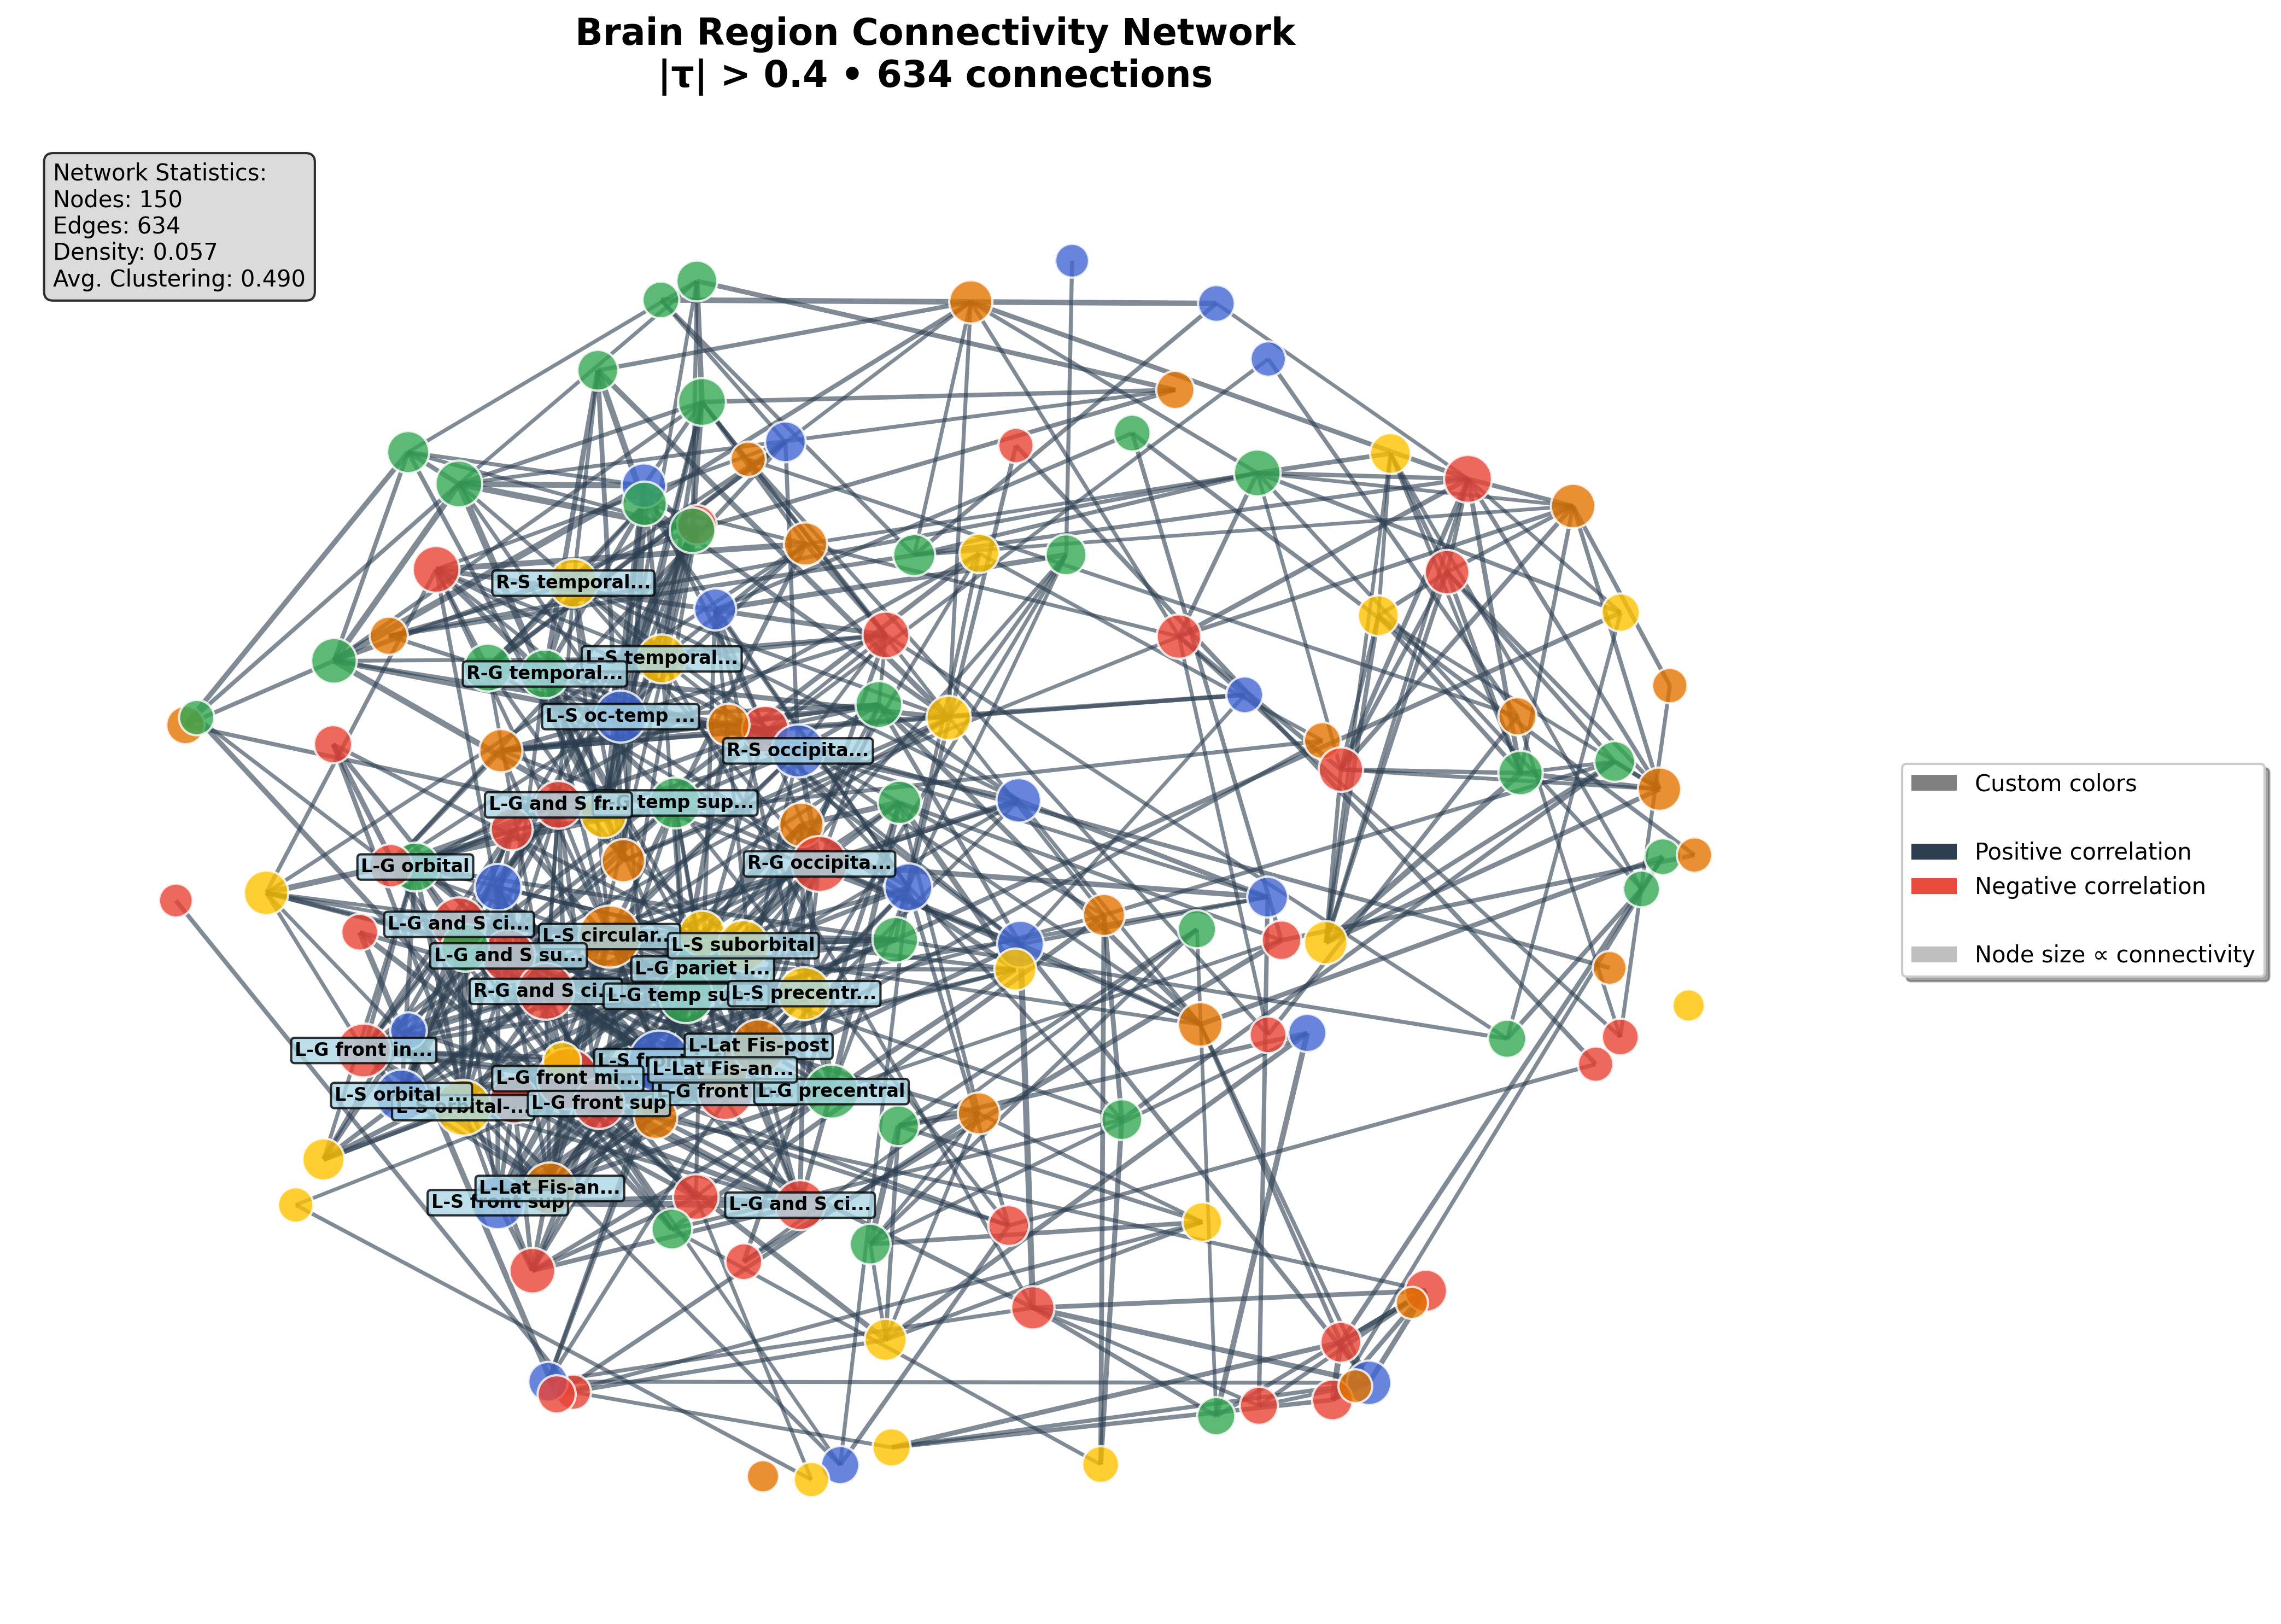

In [16]:
G, pos = cobra.network.make_network_graph(connectivity_matrix, regions, cluster_labels,
                           threshold=0.4, node_colors=colors, color_by='custom',
                           show_labels='top_n', orientation='horizontal', top_n_labels=30, n_interations=200)